# A Series of Bets
I found an intersting article from a researcher, Ole Peters of the Santa Fe Institute, which warranted analysis through computation and visualization.  The results still blow my mind.    

* https://www.santafe.edu/news-center/news/fix-economic-theory-changes-everything-gambles-inequality-ponzi-schemes
* https://www.nature.com/articles/s41567-019-0732-0

The example scenario is a coin flip game where heads would result in increasing worth by 50% and tails would decrease worth by 40%.  So you have a dollar, and heads gives you \\$1.5 and tails give you \\$0.6.  You can repeat the game as long as you like.  Should you take the bet?  Since the percentages are skewed slightly in the positive side, the average expected value is +5%, or \\$1.05.

Working through the probability theory is challenging, but luckily we have computation on our side, so we can run the hypothetical scenario a bunch of times to understand the system better than we can with theory alone.     

## Run the Simulation

In [1]:
# imports
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#list of potential outcomes
outcomes = [1.5, .6]

In [3]:
# calculate the average outcome
expectation_value = sum(outcomes)/len(outcomes)
expectation_value

1.05

In [4]:
# check our random choice function
random.choice(outcomes)

0.6

In [5]:
# run 150 scenarios where the bet is accepted 1000 times in a row
results = pd.DataFrame()
runs = 150
rounds = 1000

for run in range(runs):
    worth_list = []
    worth = 1
    worth_list.append(worth)
    for r in range(rounds):
        worth *= random.choice(outcomes)
        worth_list.append(worth)
    results[run] = worth_list
results.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.00,1.00,1.000,1.000,1.0000,1.00,1.000,1.000,1.00,1.000,...,1.000,1.000,1.00,1.000,1.000,1.000,1.00,1.000,1.000,1.000
1,0.60,1.50,0.600,1.500,0.6000,1.50,1.500,0.600,0.60,0.600,...,0.600,0.600,1.50,0.600,1.500,0.600,0.60,0.600,0.600,0.600
2,0.90,0.90,0.900,2.250,0.3600,0.90,2.250,0.360,0.36,0.360,...,0.360,0.360,0.90,0.900,0.900,0.900,0.90,0.900,0.900,0.360
3,1.35,0.54,0.540,3.375,0.2160,0.54,1.350,0.216,0.54,0.216,...,0.216,0.216,1.35,1.350,1.350,0.540,0.54,1.350,0.540,0.540
4,0.81,0.81,0.324,2.025,0.1296,0.81,2.025,0.324,0.81,0.324,...,0.324,0.324,0.81,2.025,2.025,0.324,0.81,2.025,0.324,0.324


In [6]:
# calculate the expectation value curve (assume 1.05 return on every bet)
x_lim = 1000
exp_x = np.arange(0,x_lim +1,1)
exp_y = expectation_value**exp_x
exp_x = exp_x[:-1]
exp_y = exp_y[1:]

## Visualize the Results

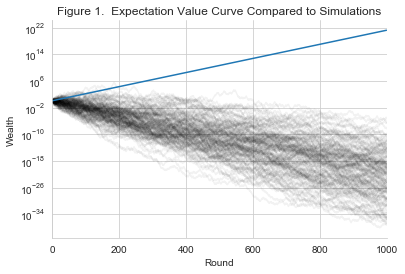

In [9]:
# plot the results- this is the same plot shown in the article
results.plot.line(legend = False, logy = True, color = 'black', alpha = .05)
plt.plot(exp_x, exp_y)
plt.title('Figure 1.  Expectation Value Curve Compared to Simulations')
plt.ylabel('Wealth')
plt.xlabel('Round')
sns.set_style("whitegrid")
sns.despine()

Wow.  **All** the simulations go to ~zero eventually, although there are some periods of geometric growth.  Interesting.  There is something going on in the long-term, where all paths end up going broke and having not capital to get going again.  In the short-term, did the bet look better?  

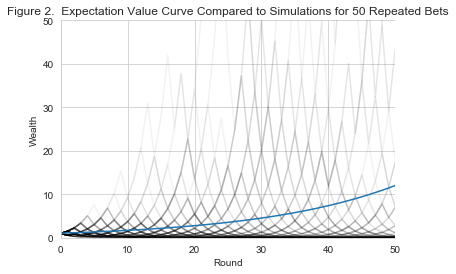

In [10]:
# plot near the origin
results.plot.line(legend = False, color = 'black', alpha = .05, ylim=(0,50), xlim = (0,50))
plt.plot(exp_x, exp_y)
plt.title('Figure 2.  Expectation Value Curve Compared to Simulations for 50 Repeated Bets')
plt.ylabel('Wealth')
plt.xlabel('Round')
sns.set_style("whitegrid")
sns.despine()

This is a cool looking pattern, clearly some scenarios are beating the odds and others are going broke, but it is hard to understand the averages.  Let's plot the averages and confidence intervals.   

(0, 1000)

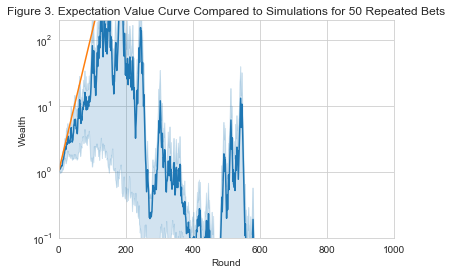

In [14]:
# plot the averages and confidence intervals
cols = results.columns
sns.lineplot(data = results.reset_index().melt(id_vars = 'index' ,value_vars = cols), 
             x='index', y='value')

plt.title('Figure 3. Expectation Value Curve Compared to Simulations for 50 Repeated Bets')
plt.plot( exp_x, exp_y)
plt.ylabel('Wealth')
plt.xlabel('Round')
plt.yscale('log')
plt.ylim(0.1,200)
plt.xlim(0,1000)

Interestingly, the averages do follow the expected value for a while, before plateauing off.  It is only later in the simulation that the total worth crashes in all scenarios.  What does it look like without the log scale?    

(0, 1000)

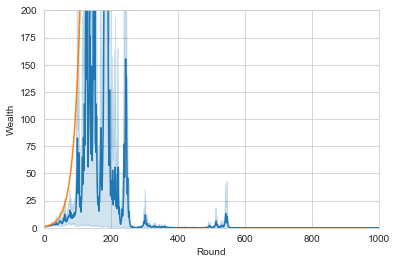

In [13]:
sns.lineplot(data = results.reset_index().melt(id_vars = 'index' ,value_vars = cols), 
             x='index', y='value')
plt.plot( exp_x, exp_y)
plt.ylabel('Wealth')
plt.xlabel('Round')
plt.ylim(0,200)
plt.xlim(0,1000)

There is a random smattering of exponential growth, which is eventually followed by a complete crash.

## Discussion

The major point of my notebook is that simulation and visualization present a simple and powerful way to understand probabity.  With little knowledge of the math (i.e., "the ergodicity problem in economics"), we can easily debunk and the intuition that the series of bets will converge on the average return.

Ole Peters' article goes in depth on the mathematics behind this phenomenon, and finishes by discussing that our intuition for probability is actually more correct than we give it credit for, because people can intuit expected returns, even in the face of misconceived probability theory.  